In [17]:
import numpy as np
import scipy.constants as cts
import scipy.stats as stats
import gc
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
from scipy.special import hermite, factorial
import RSC_sim
from pathos.multiprocessing import Pool

### Use piecewise to recreate the original sequence

In [18]:
sequence = RSC_sim.load_sequence('sequences/original.txt')

In [19]:
ground_state_counts = []
ground_errs = []
nums_survive = []
num_errs = []
n_bars = []
n_errs = []

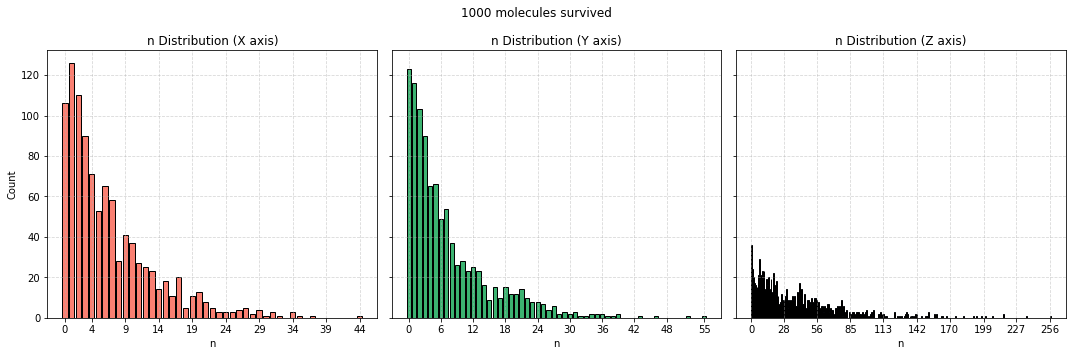

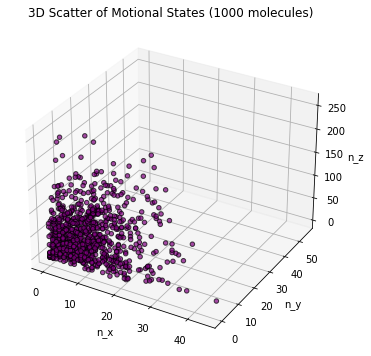

In [20]:
mol_list = RSC_sim.initialize_thermal([25e-6, 25e-6, 25e-6], 1000)
_, _, _ = RSC_sim.get_n_distribution(mol_list)

In [21]:
n_bar, num_survive, ground_state_count, n_err, num_err, ground_err = RSC_sim.apply_raman_sequence(mol_list, sequence, record_all=True)
ground_state_counts.append(ground_state_count)
ground_errs.append(ground_err)
nums_survive.append(num_survive)
num_errs.append(num_err)
n_bars.append(n_bar)
n_errs.append(n_err)

Running molecules (CPU parallel): 100%|██████████| 1000/1000 [00:46<00:00, 21.61it/s]


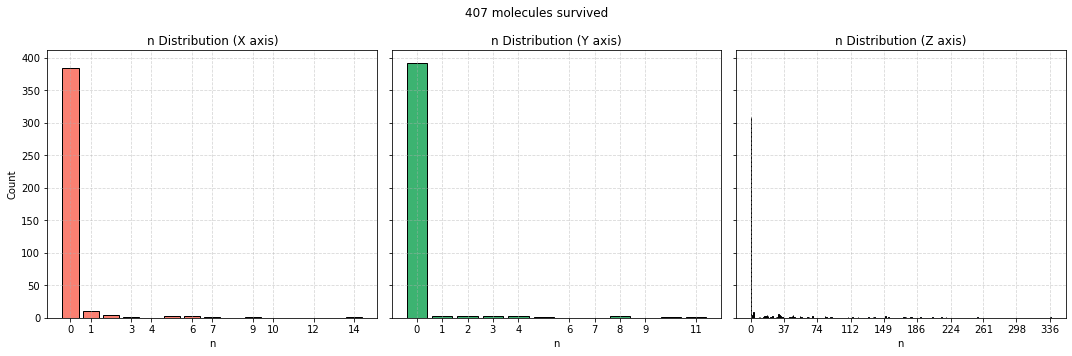

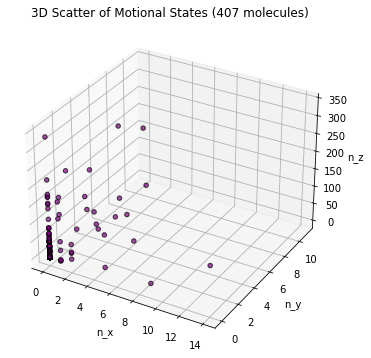

In [22]:
_, _, _ = RSC_sim.get_n_distribution(mol_list)

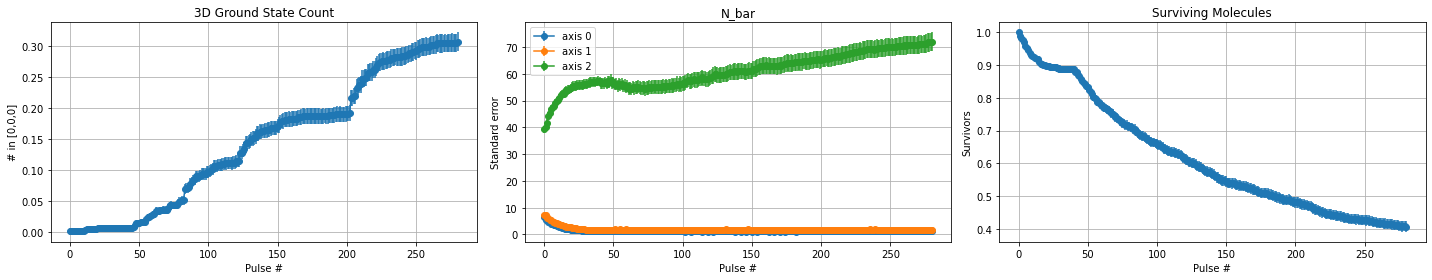

In [23]:
RSC_sim.plot_time_sequence_data(n_bar, num_survive, ground_state_count, n_err, num_err, ground_err)

### Optimize with Genetic Algorithm

In [24]:
sequence = RSC_sim.load_sequence('sequences/best_sequence_1.txt')

In [25]:
mol_list = RSC_sim.initialize_thermal([25e-6, 25e-6, 25e-6], 1000)

In [26]:
n_bar, num_survive, ground_state_count, n_err, num_err, ground_err = RSC_sim.apply_raman_sequence(mol_list, sequence, record_all=True)
ground_state_counts.append(ground_state_count)
ground_errs.append(ground_err)
nums_survive.append(num_survive)
num_errs.append(num_err)
n_bars.append(n_bar)
n_errs.append(n_err)

Running molecules (CPU parallel): 100%|██████████| 1000/1000 [00:44<00:00, 22.63it/s]


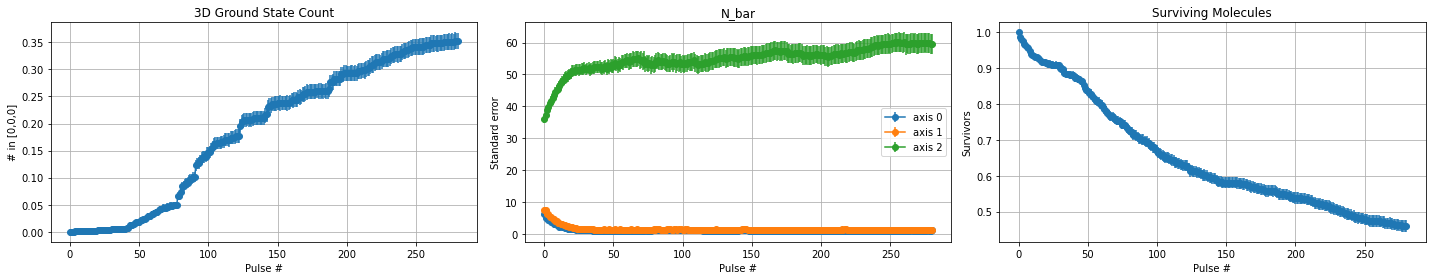

In [27]:
RSC_sim.plot_time_sequence_data(n_bar, num_survive, ground_state_count, n_err, num_err, ground_err)

#### Optimize again

In [28]:
sequence = RSC_sim.load_sequence('sequences/best_sequence_same_length.txt')

In [29]:
mol_list = RSC_sim.initialize_thermal([25e-6, 25e-6, 25e-6], 1000)
n_bar, num_survive, ground_state_count, n_err, num_err, ground_err = RSC_sim.apply_raman_sequence(mol_list, sequence, record_all=True)
ground_state_counts.append(ground_state_count)
ground_errs.append(ground_err)
nums_survive.append(num_survive)
num_errs.append(num_err)
n_bars.append(n_bar)
n_errs.append(n_err)

Running molecules (CPU parallel): 100%|██████████| 1000/1000 [00:44<00:00, 22.60it/s]


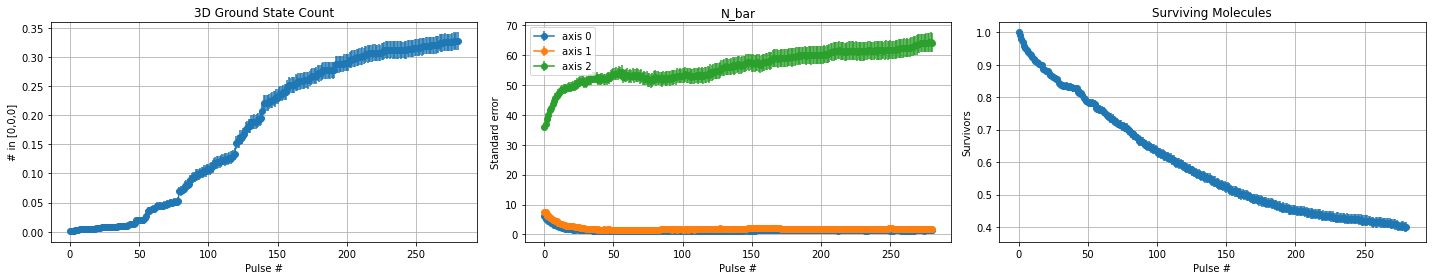

In [30]:
RSC_sim.plot_time_sequence_data(n_bar, num_survive, ground_state_count, n_err, num_err, ground_err)

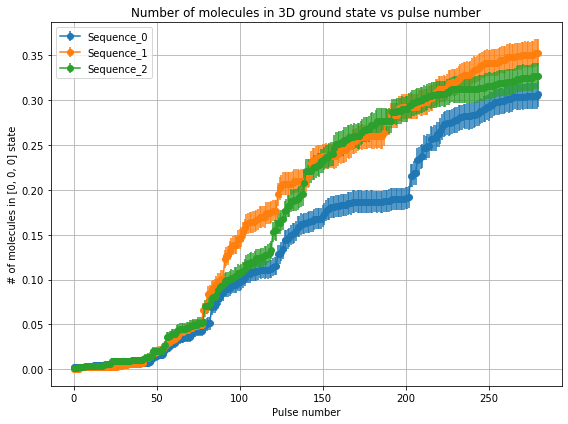

In [31]:
plt.figure(figsize=(8, 6))
for i, count in enumerate(ground_state_counts):
    plt.errorbar(range(len(count)), count, ground_errs[i], marker='o', label=f'Sequence_{i}')
plt.title("Number of molecules in 3D ground state vs pulse number")
plt.xlabel("Pulse number")
plt.ylabel("# of molecules in [0, 0, 0] state")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()